# Business Case: Delhivery Feature Engineering

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.
Through this analysis, we will try to answer questions such as which routes are most popular or faster,which factors are responsible for better logistics,which route type is preferable, which states have more no. of deliveries,etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import datetime
import time
warnings.simplefilter(action='ignore',category=Warning)

C:\Users\abhi0\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_dvery=pd.read_csv("delhivery_data.csv")

In [3]:
df_dvery.shape

(144867, 24)

In [4]:
df_dvery.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [5]:
df_dvery.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
df_dvery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

Source Name and Destination Name have missing values in the dataset

In [7]:
print("No of records where source name is not available:"+str(df_dvery['source_name'].isna().sum()))

No of records where source name is not available:293


In [8]:
print("No of records where destination name is not available:"+str(df_dvery['destination_name'].isna().sum()))

No of records where destination name is not available:261


In [9]:
# Check if Records where source name is null have source center values or not
df_dvery[df_dvery["source_name"].isna()&~df_dvery["source_center"].isna()][['source_center','source_name']]

,source_center,source_name
112,IND342902A1B,NaN
113,IND342902A1B,NaN
114,IND342902A1B,NaN
115,IND342902A1B,NaN
116,IND342902A1B,NaN
...,...,...
144484,IND282002AAD,NaN
144485,IND282002AAD,NaN
144486,IND282002AAD,NaN
144487,IND282002AAD,NaN


In [10]:
# Check if Records where destination name is null have destination center values or not
df_dvery[df_dvery["destination_name"].isna()&~df_dvery["destination_center"].isna()][['destination_center','destination_name']]

,destination_center,destination_name
110,IND342902A1B,NaN
111,IND342902A1B,NaN
982,IND577116AAA,NaN
983,IND577116AAA,NaN
4882,IND282002AAD,NaN
...,...,...
144478,IND282002AAD,NaN
144479,IND282002AAD,NaN
144480,IND282002AAD,NaN
144481,IND282002AAD,NaN


In [11]:
#Let's replace missing values of source name and destination name with 'Others'
df_dvery['source_name'].fillna('Others',inplace=True)
df_dvery['destination_name'].fillna('Others',inplace=True)

In [12]:
#numerical features
df_dvery.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [13]:
# categorical features
df_dvery.describe(include = ['object'])

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144867,144867,144867,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1499,1481,1469,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [14]:
df_dvery['data'].value_counts()

training    104858
test         40009
Name: data, dtype: int64

In [15]:
df_dvery['route_type'].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

There is no information available about few columns so lets drop those columns from the dataset

In [16]:
df_dvery=df_dvery.drop(['route_schedule_uuid','is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1)


In [17]:
df_dvery.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


### Aggregation - Level 1

In [18]:
df_trip_seg=df_dvery.groupby(['trip_uuid','source_center','destination_center','source_name','destination_name']).agg(
                       {'trip_creation_time':'first',
                        'route_type':'first',
                        'od_start_time':'first',
                        'od_end_time':'last',
                        'start_scan_to_end_scan':'first',
                        'actual_distance_to_destination':'max',
                        'actual_time':'max',
                        'osrm_time':'max',
                        'osrm_distance':'max',
                        'segment_actual_time':'sum',
                        'segment_osrm_time':'sum',
                        'segment_osrm_distance':'sum'}).sort_values(by=['trip_uuid','od_start_time']).reset_index()

In [19]:
df_trip_seg

,trip_uuid,source_center,destination_center,source_name,destination_name,trip_creation_time,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
1,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
2,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
3,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
4,trip-153671043369099517,IND562132AAA,IND000000ACB,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1529.0,2090.8743,2700.0,1710.0,2227.5270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-03 23:59:14.390954,Carting,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069,IND627657AAA,IND628613AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-03 23:59:14.390954,Carting,2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,45.0,17.373209,33.0,31.0,25.7087,32.0,30.0,25.7087
26365,trip-153861115439069069,IND628613AAA,IND627005AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,Carting,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26366,trip-153861118270144424,IND583201AAA,IND583119AAA,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-03 23:59:42.701692,FTL,2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,25.534793,42.0,26.0,28.0484,41.0,25.0,28.0484


### Aggregation - Level 2

In [20]:
df_trip=df_trip_seg.groupby(['trip_uuid']).agg(
                       {'trip_creation_time':'first',
                        'route_type':'first',
                        'od_start_time':'first',
                        'od_end_time':'last',
                        'source_center': 'first',
                        'destination_center': 'last',
                        'source_name': 'first',
                        'destination_name': 'last',
                        'start_scan_to_end_scan':'sum',
                        'actual_time':'sum',
                        'actual_distance_to_destination':'sum',
                        'osrm_time':'sum',
                        'osrm_distance':'sum',
                        'segment_osrm_time':'sum',
                        'segment_osrm_distance':'sum',
                       'segment_actual_time':'sum'}).reset_index()

In [21]:
df_trip.shape

(14817, 17)

In [22]:
df_trip

,trip_uuid,trip_creation_time,route_type,od_start_time,od_end_time,source_center,destination_center,source_name,destination_name,start_scan_to_end_scan,actual_time,actual_distance_to_destination,osrm_time,osrm_distance,segment_osrm_time,segment_osrm_distance,segment_actual_time
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2259.0,1562.0,824.732854,743.0,991.3523,1008.0,1320.4733,1548.0
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),180.0,143.0,73.186911,68.0,85.1110,65.0,84.1894,141.0
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),3933.0,3347.0,1932.273969,1741.0,2372.0852,1941.0,2545.2678,3308.0
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,59.0,17.175274,15.0,19.6800,16.0,19.8766,59.0
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),717.0,341.0,127.448500,117.0,146.7918,115.0,146.7919,340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,IND160002AAC,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),257.0,83.0,57.762332,62.0,73.4630,62.0,64.8551,82.0
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,IND121004AAB,IND121004AAA,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.0,21.0,15.513784,12.0,16.0882,11.0,16.0883,21.0
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,Carting,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,IND209304AAA,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),421.0,282.0,38.684839,54.0,63.2841,88.0,104.8866,281.0
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,Carting,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,IND627005AAA,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),347.0,264.0,134.723836,184.0,177.6635,221.0,223.5324,258.0


### Creation of New Features:

Converting trip_creation_time, od_start_time, and od_end_time into datetime format

In [23]:
df_trip['trip_creation_time']=pd.to_datetime(df_trip['trip_creation_time'])
df_trip['od_start_time']=pd.to_datetime(df_trip['od_start_time'])
df_trip['od_end_time']=pd.to_datetime(df_trip['od_end_time'])

1.src_city\
2.src_region\
3.src_state\
4.dest_city\
5.dest_region\
6.dest_state\
7.scan_time\
8.time taken to start trip\
9.total_od_time\
10.trip_month\
11.trip_year\
12.trip_day\
13.trip_day_of_week

In [24]:
df_trip['src_city']=df_trip['source_name'].str.split('(').str[0].str.split('_').str[0]
df_trip['src_region']=df_trip['source_name'].str.split('(').str[0].str.split('_').str[1]
df_trip['src_state']=df_trip['source_name'].str.split('(').str[-1].str.split(')').str[0]

In [25]:
df_trip['dest_city']=df_trip['destination_name'].str.split('(').str[0].str.split('_').str[0]
df_trip['dest_region']=df_trip['destination_name'].str.split('(').str[0].str.split('_').str[1]
df_trip['dest_state']=df_trip['destination_name'].str.split('(').str[-1].str.split(')').str[0]

In [26]:
#time required to scan the products before loading
df_trip['scan_time']=df_trip['start_scan_to_end_scan']-df_trip['actual_time']

In [27]:
#time required to reach the destination from the source
df_trip['total_od_time']=(df_trip['od_end_time']-df_trip['od_start_time']).astype('timedelta64[m]')

In [28]:
#time required to start the trip from the source after the trip is created
df_trip['time_taken_to_start_trip']=(df_trip['od_start_time']-df_trip['trip_creation_time']).astype('timedelta64[m]')

In [29]:
df_trip['trip_month']=df_trip['trip_creation_time'].dt.month_name(locale = 'English') 
df_trip['trip_year']=df_trip['trip_creation_time'].dt.year
df_trip['trip_day']=df_trip['trip_creation_time'].dt.day
df_trip['trip_day_of_week']=df_trip['trip_creation_time'].dt.day_name()

In [30]:
df_trip.columns

Index(['trip_uuid', 'trip_creation_time', 'route_type', 'od_start_time',
       'od_end_time', 'source_center', 'destination_center', 'source_name',
       'destination_name', 'start_scan_to_end_scan', 'actual_time',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_time',
       'src_city', 'src_region', 'src_state', 'dest_city', 'dest_region',
       'dest_state', 'scan_time', 'total_od_time', 'time_taken_to_start_trip',
       'trip_month', 'trip_year', 'trip_day', 'trip_day_of_week'],
      dtype='object')

## Visual Analysis

([<matplotlib.patches.Wedge at 0x16c5050a940>,
 [Text(-0.34386446114865143, 1.0448718736567406, 'Carting'),
  Text(0.3438643633206845, -1.0448719058516505, 'FTL')],
 [Text(-0.18756243335380984, 0.5699301129036767, '60.12%'),
  Text(0.18756237999310063, -0.5699301304645366, '39.88%')])

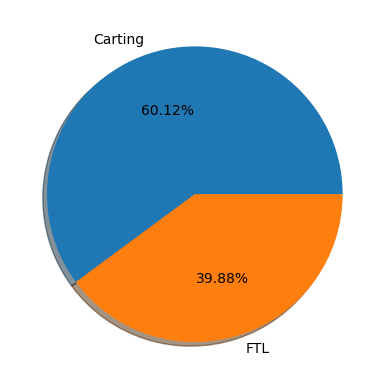

In [31]:
plt.pie(data=df_trip,x=df_trip['route_type'].value_counts(),labels=['Carting','FTL'],autopct='%0.2f%%',shadow=True)

([<matplotlib.patches.Wedge at 0x16c505ab4c0>,
 [Text(-1.0218966840805375, 0.40709601700974973, 'September'),
  Text(1.021896655494225, -0.407096088767403, 'October')],
 [Text(-0.5573981913166567, 0.2220523729144089, '87.93%'),
  Text(0.5573981757241228, -0.22205241205494705, '12.07%')])

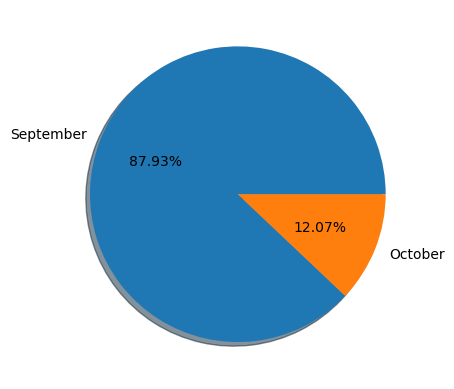

In [32]:
plt.pie(data=df_trip,x=df_trip['trip_month'].value_counts(),labels=['September','October'],autopct='%0.2f%%',shadow=True)

<AxesSubplot:xlabel='trip_day', ylabel='count'>

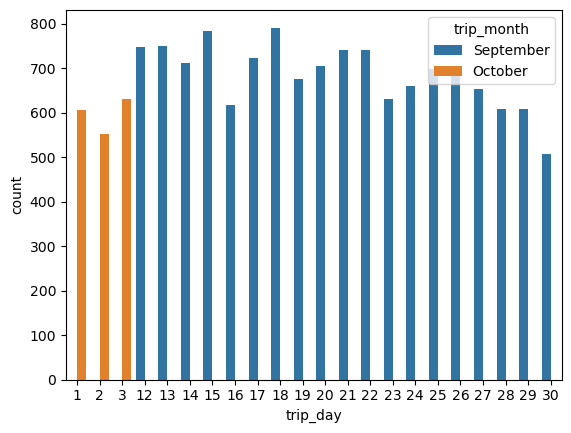

In [33]:
sns.countplot(data=df_trip,x='trip_day',hue='trip_month')

<AxesSubplot:xlabel='trip_day_of_week', ylabel='count'>

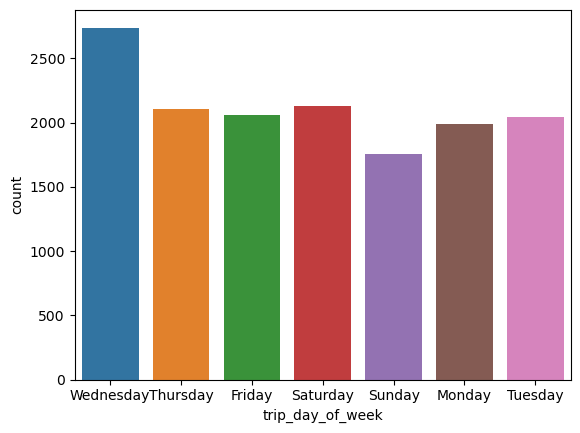

In [34]:
sns.countplot(data=df_trip,x='trip_day_of_week')

<AxesSubplot:xlabel='src_state'>

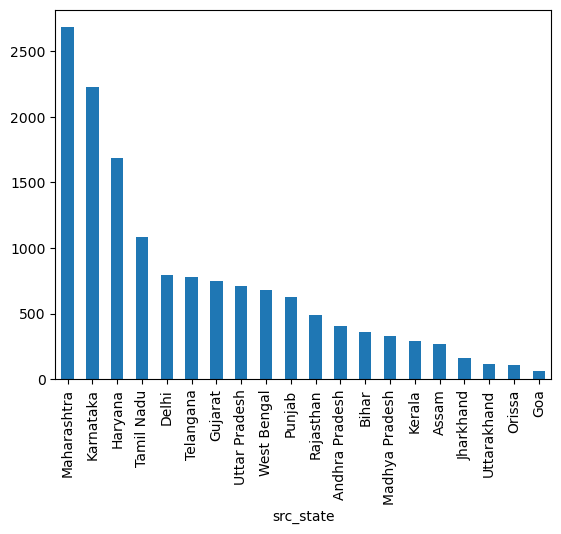

In [35]:
#No of Trips from source state
df_trip.groupby('src_state')['trip_uuid'].count().sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:xlabel='dest_state'>

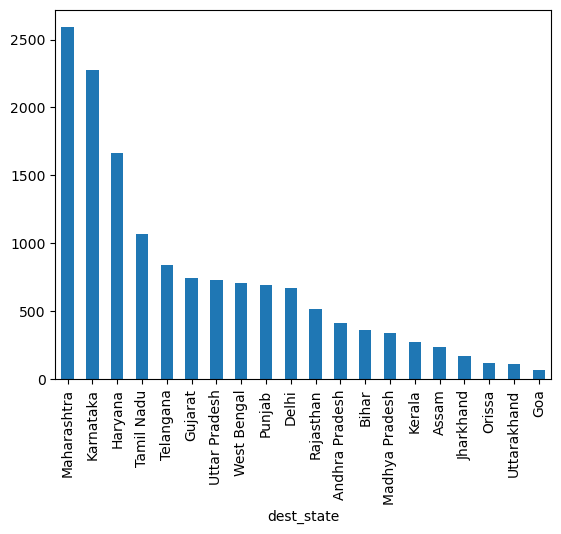

In [36]:
#No of Trips from destination state
df_trip.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:xlabel='src_region,src_state'>

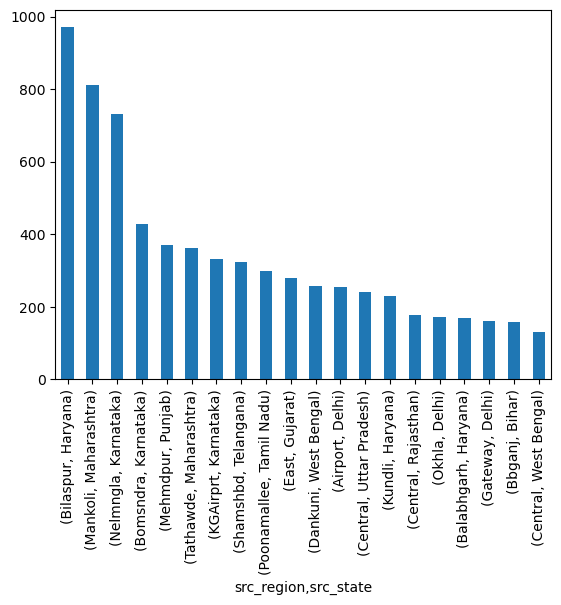

In [37]:
#No of Trips from source region and state
df_trip.groupby(['src_region','src_state'])['trip_uuid'].count().sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:xlabel='dest_region,dest_state'>

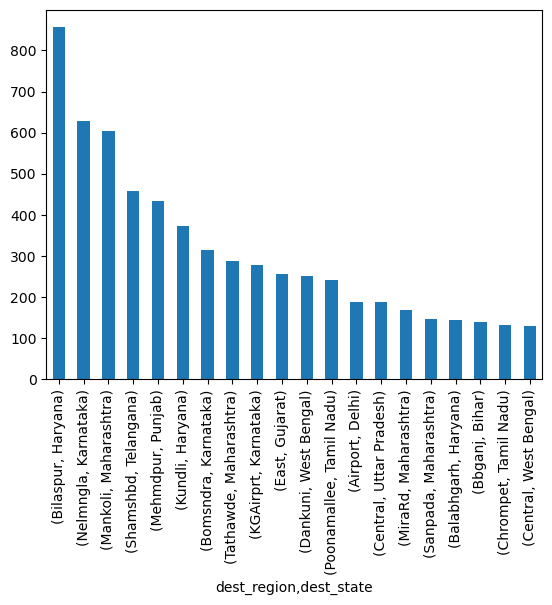

In [38]:
#No of Trips from destination region and state
df_trip.groupby(['dest_region','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:xlabel='src_city,src_state'>

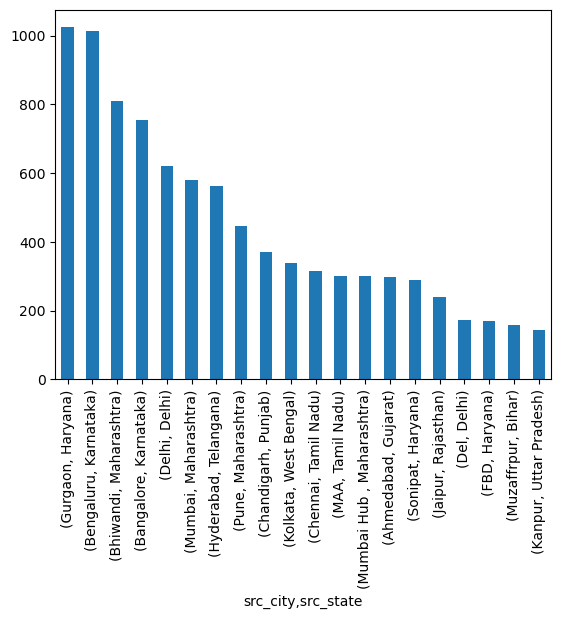

In [39]:
#No of Trips from source city and state
df_trip.groupby(['src_city','src_state'])['trip_uuid'].count().sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:xlabel='dest_city,dest_state'>

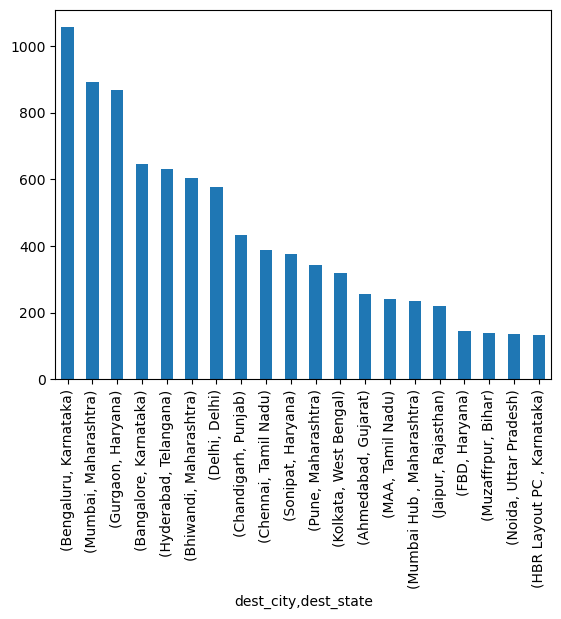

In [40]:
#No of Trips from destination city and state
df_trip.groupby(['dest_city','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:xlabel='route_type'>

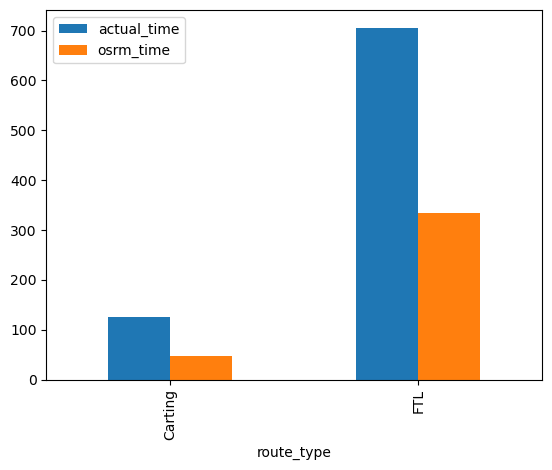

In [41]:
#Comparison of Average Delivery Time for Route Type
df_trip.groupby('route_type').agg({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')

<AxesSubplot:xlabel='src_state'>

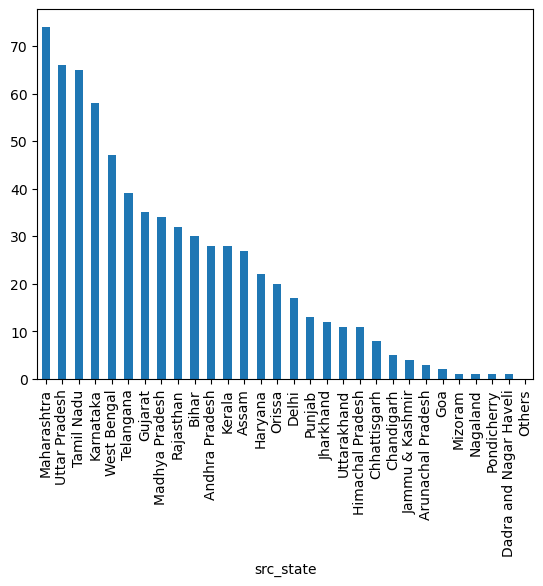

In [42]:
#Comparison of number of delivery centres in Source States
df_trip.groupby('src_state')['src_region'].nunique().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='dest_state'>

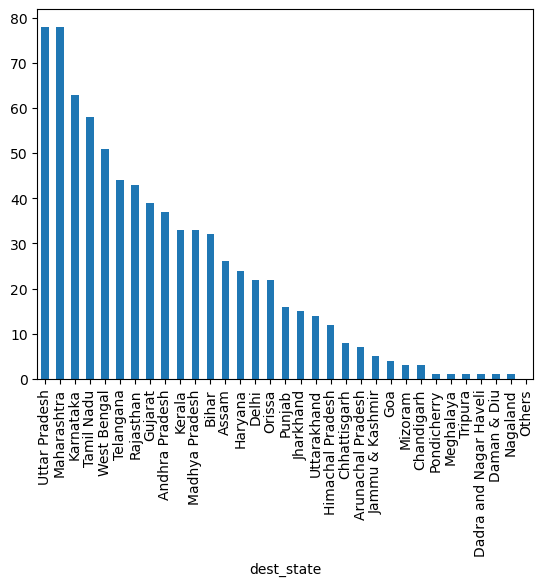

In [43]:
#Comparison of number of delivery centres in Destination States
df_trip.groupby('dest_state')['dest_region'].nunique().sort_values(ascending=False).plot(kind='bar')

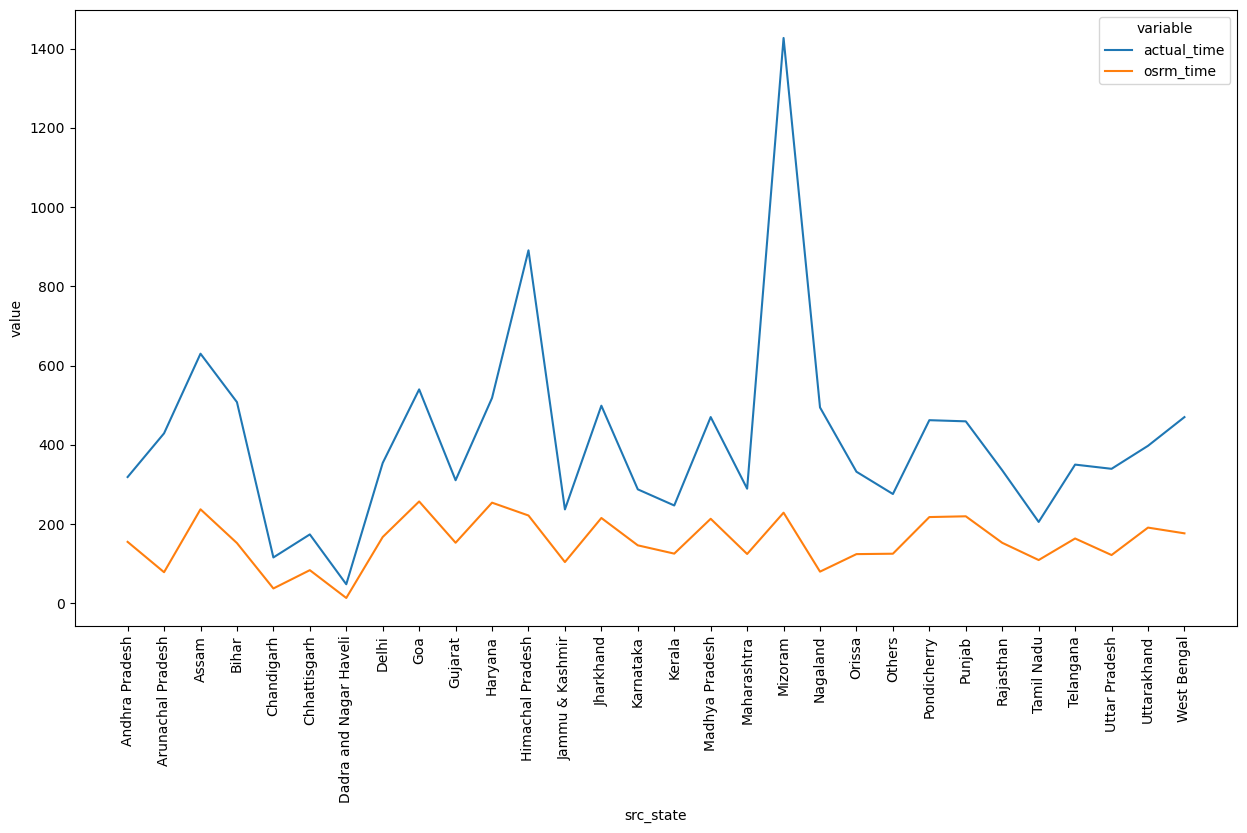

In [44]:
#Comparison of Average Actual Time and Average OSRM Time for source states
x=df_trip.groupby('src_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x=pd.melt(x,id_vars=['src_state'],value_vars=['actual_time', 'osrm_time'])
plt.figure(figsize=(15,8))
sns.lineplot(data=x,x='src_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

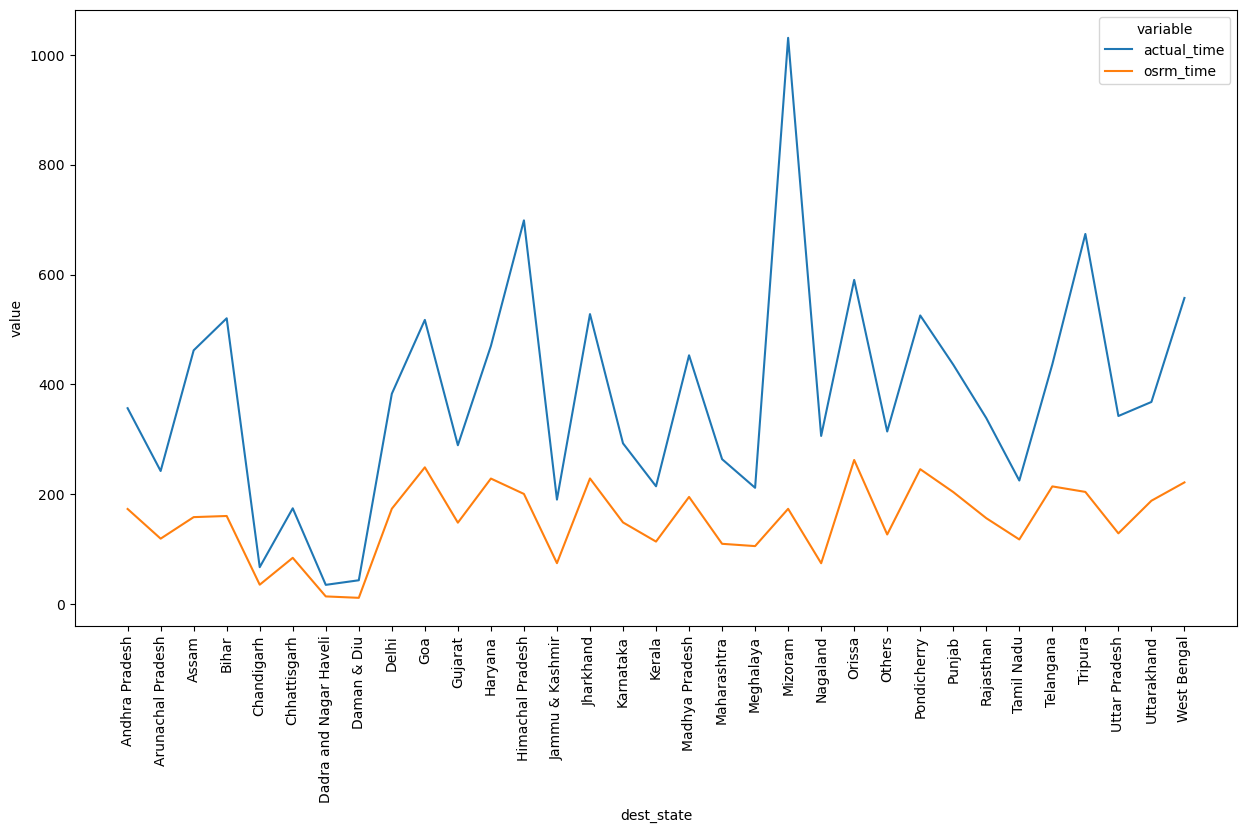

In [45]:
#Comparison of Average Actual Time and Average OSRM Time for destination states
x=df_trip.groupby('dest_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x=pd.melt(x,id_vars=['dest_state'],value_vars=['actual_time', 'osrm_time'])
plt.figure(figsize=(15,8))
sns.lineplot(data=x,x='dest_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

In [46]:
df_trip['trip_day']=df_trip['trip_day'].astype('str')
df_trip['trip_year']=df_trip['trip_year'].astype('str')

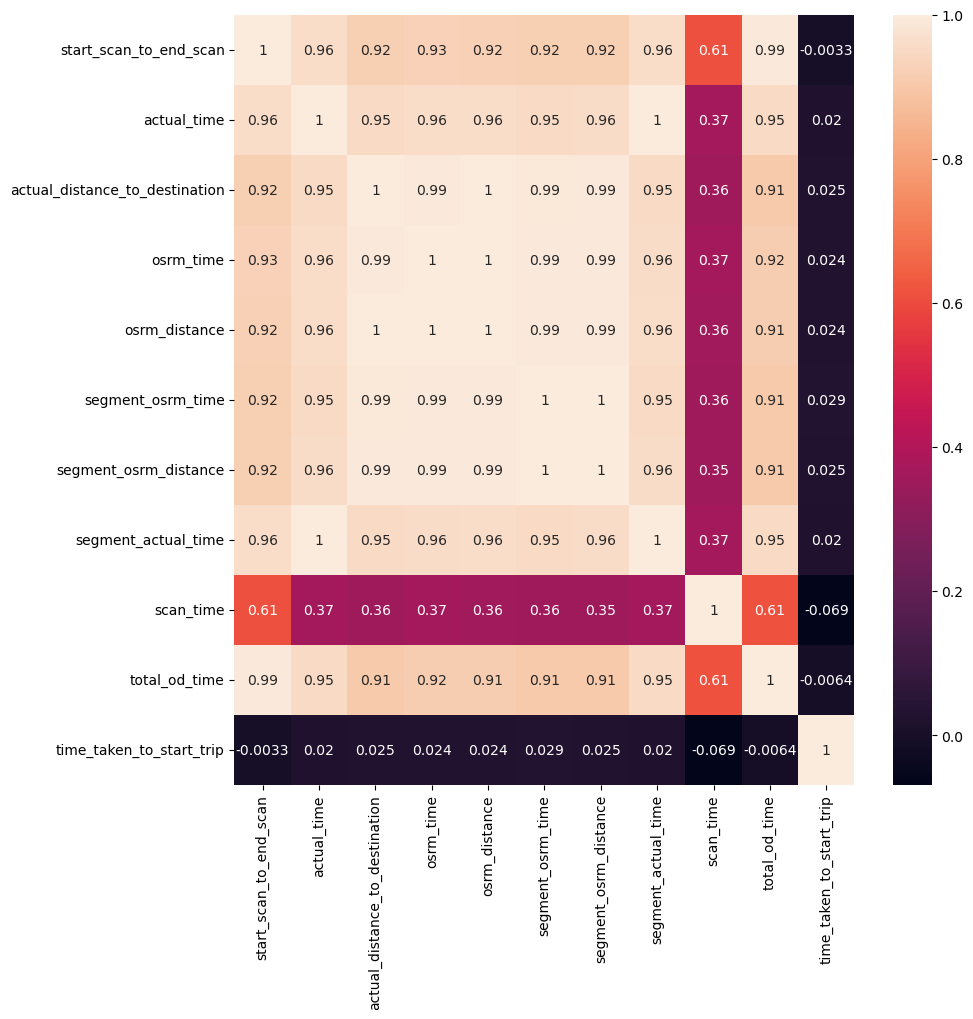

In [47]:

num_cols = df_trip.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_trip[num_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Hypothesis Testing

##### 1. Comparison of start_scan_to_end_scan with total_od_time

Let us conduct a two sample T-test on the data:
-  Ho: start_scan_to_end_scan is same as total_od_time
-  Ha: start_scan_to_end_scan is different from total_od_time

In [48]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(df_trip['start_scan_to_end_scan'],df_trip['total_od_time'],equal_var=False,alternative='two-sided')

In [49]:
p_value

0.036218920818499575

Considering the alpha=0.05:\
As the p-value is less than 0.05,we fail to reject the null hypothesis which means that start_scan_to_end_scan is different from total_od_time

##### 2. Comparison of actual_time with OSRM time

Let us conduct a two sample left-tailed T-test on the data:
-  Ho: actual_time is equal to osrm_time
-  Ha: actual_time is greater than osrm_time

In [50]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(df_trip['actual_time'],df_trip['osrm_time'],equal_var=False,alternative='greater')

In [51]:
p_value

5.2512181531731765e-307

Considering the alpha=0.05:\
As the p-value is less than 0.05,we reject the null hypothesis which means that actual_time is greater than osrm_time i.e, time calculated by open-source routing engine.

##### 3. Comparison of actual_time with segment_actual_time

In [52]:
df_trip[['actual_time','segment_actual_time']]

,actual_time,segment_actual_time
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14812,83.0,82.0
14813,21.0,21.0
14814,282.0,281.0
14815,264.0,258.0


Let us conduct a two sample T-test on the data:
-  Ho: actual_time is same as segment_actual_time
-  Ha: actual_time is different from segment_actual_time

In [53]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(df_trip['actual_time'],df_trip['segment_actual_time'],equal_var=False,alternative='two-sided')

In [54]:
p_value

0.616513865138161

Considering the alpha=0.05:\
As the p-value is greater than 0.05,we fail to reject the null hypothesis which means that actual_time is almost same as segment_actual_time

##### 4. Comparison of osrm_distance with segment_osrm_distance

In [55]:
df_trip[['osrm_distance','segment_osrm_distance']]

,osrm_distance,segment_osrm_distance
0,991.3523,1320.4733
1,85.1110,84.1894
2,2372.0852,2545.2678
3,19.6800,19.8766
4,146.7918,146.7919
...,...,...
14812,73.4630,64.8551
14813,16.0882,16.0883
14814,63.2841,104.8866
14815,177.6635,223.5324


Let us conduct a two sample T-test on the data:
-  Ho: osrm_distance is equal to segment_osrm_distance
-  Ha: osrm_distance is less than segment_osrm_distance

In [56]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(df_trip['osrm_distance'],df_trip['segment_osrm_distance'],equal_var=False,alternative='less')

In [57]:
p_value

3.9112345754775614e-05

Considering the alpha=0.05:\
As the p-value is less than 0.05,we reject the null hypothesis which means that osrm_distance is less than segment_osrm_distance i.e, distance calculated by open-source routing engine aggregated by segment.

##### 5. Comparison of osrm_time with segment_osrm_time

In [58]:
df_trip[['osrm_time','segment_osrm_time']]

,osrm_time,segment_osrm_time
0,743.0,1008.0
1,68.0,65.0
2,1741.0,1941.0
3,15.0,16.0
4,117.0,115.0
...,...,...
14812,62.0,62.0
14813,12.0,11.0
14814,54.0,88.0
14815,184.0,221.0


Let us conduct a two sample T-test on the data:
-  Ho: osrm_time is equal to segment_osrm_time
-  Ha: osrm_time is greater than segment_osrm_time

In [59]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(df_trip['osrm_time'],df_trip['segment_osrm_time'],equal_var=False,alternative='less')

In [60]:
p_value

1.6753511660628476e-08

Considering the alpha=0.05:\
As the p-value is less than 0.05,we reject the null hypothesis which means that osrm_time is less than to segment_osrm_time i.e, time calculated by open-source routing engine aggregated by segment.

### Data Analysis

In [61]:
#Check from which state most orders are coming from:
df_trip['src_state'].value_counts().head(1)

Maharashtra    2682
Name: src_state, dtype: int64

In [62]:
#Check from which city most orders are coming from:
df_trip['src_city'].value_counts().head(1)

Gurgaon    1024
Name: src_city, dtype: int64

In [63]:
#Check from which state most orders are reaching to:
df_trip['dest_state'].value_counts().head(1)

Maharashtra    2591
Name: dest_state, dtype: int64

In [64]:
#Check from which city most orders are reaching to:
df_trip['dest_city'].value_counts().head(1)

Bengaluru    1056
Name: dest_city, dtype: int64

In [65]:
#Check which is the busiest corridor:
df_trip[['source_name', 'destination_name']].value_counts().head(5)

source_name                        destination_name                 
Chandigarh_Mehmdpur_H (Punjab)     Chandigarh_Mehmdpur_H (Punjab)       175
Bangalore_Nelmngla_H (Karnataka)   Bengaluru_KGAirprt_HB (Karnataka)    151
Muzaffrpur_Bbganj_I (Bihar)        Muzaffrpur_Bbganj_I (Bihar)          130
Bengaluru_Bomsndra_HB (Karnataka)  Bengaluru_KGAirprt_HB (Karnataka)    121
Bhiwandi_Mankoli_HB (Maharashtra)  Bhiwandi_Mankoli_HB (Maharashtra)    113
dtype: int64

In [66]:
# Avg time taken by the busiest corridor
df_trip[(df_trip['source_name']=='Bangalore_Nelmngla_H (Karnataka)')&(df_trip['destination_name']=='Bengaluru_KGAirprt_HB (Karnataka)')]['total_od_time'].mean()

183.03311258278146

In [67]:
# Avg distance taken by busiest corridor
df_trip[(df_trip['source_name']=='Bangalore_Nelmngla_H (Karnataka)')&(df_trip['destination_name']=='Bengaluru_KGAirprt_HB (Karnataka)')]['actual_distance_to_destination'].mean()

28.03163476896394

In [68]:
#Check which is the least used corridor:
df_trip[['source_name', 'destination_name']].value_counts().tail(1)

source_name                           destination_name               
Berhampore_Central_I_2 (West Bengal)  Khargram_BoiDPP_D (West Bengal)    1
dtype: int64

In [69]:
#Check which is the longest route
df_trip[['source_name', 'destination_name','start_scan_to_end_scan']].sort_values(by='start_scan_to_end_scan',ascending=False).head(1)

,source_name,destination_name,start_scan_to_end_scan
13600,Pappadahandi_Central_DPP_2 (Orissa),Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),7898.0


In [70]:
#Check which source centre has the most scan time
df_trip[['source_name','scan_time']].sort_values(by='scan_time',ascending=False).head(1)

,source_name,scan_time
13600,Pappadahandi_Central_DPP_2 (Orissa),5357.0


In [71]:
#Check which destination centre has the most scan time
df_trip[['destination_name','scan_time']].sort_values(by='scan_time',ascending=False).head(1)

,destination_name,scan_time
13600,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),5357.0


In [72]:
#Check which route type takes the average longest time
df_trip[['route_type','start_scan_to_end_scan']].groupby('route_type').agg({'start_scan_to_end_scan':'mean'})

,start_scan_to_end_scan
route_type,
Carting,246.537382
FTL,959.359790


### Outlier Handling:

<AxesSubplot:>

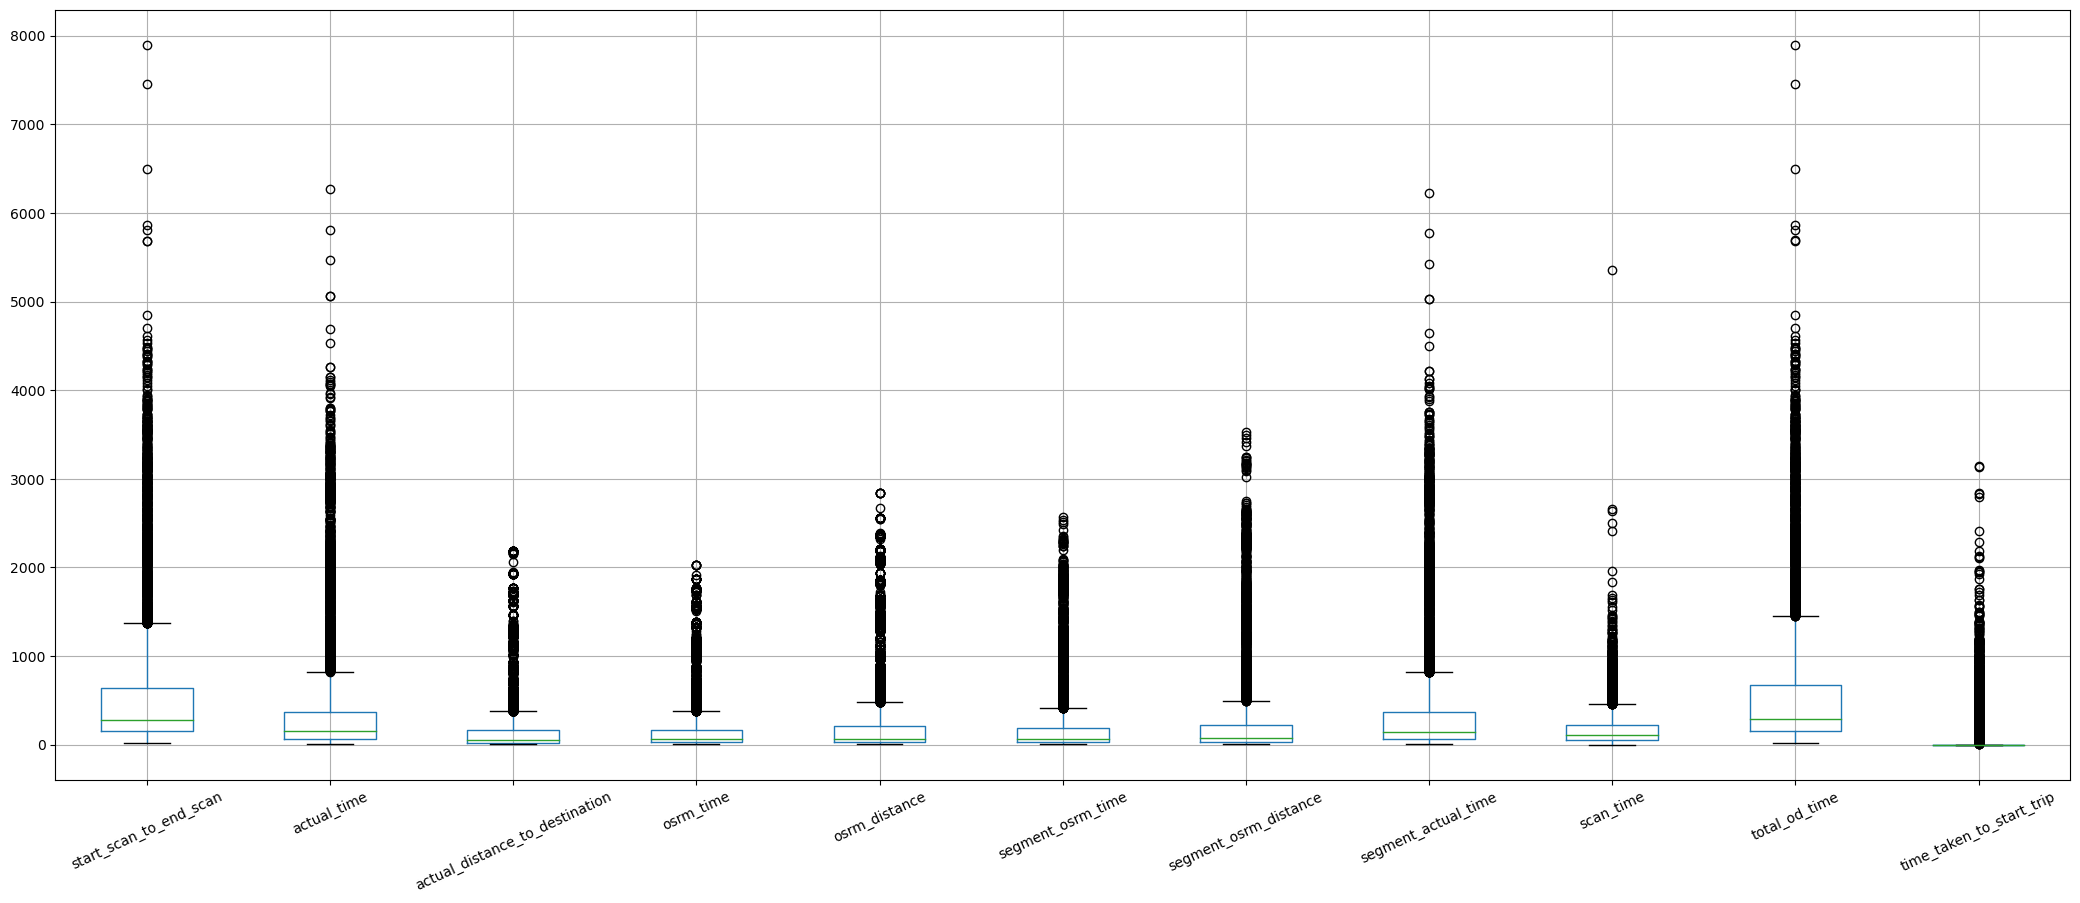

In [73]:
df_trip[num_cols].boxplot(rot=25,figsize=(26,10))

In [74]:
Q1=df_trip[num_cols].quantile(0.25)
Q3=df_trip[num_cols].quantile(0.75)

In [75]:
IQR=Q3-Q1

In [76]:
df_trip=df_trip[~((df_trip[num_cols]<Q1-1.5*IQR)|(df_trip[num_cols]>Q3+1.5*IQR)).any(axis=1)]
df_trip.reset_index()

,index,trip_uuid,trip_creation_time,route_type,od_start_time,od_end_time,source_center,destination_center,source_name,destination_name,...,dest_city,dest_region,dest_state,scan_time,total_od_time,time_taken_to_start_trip,trip_month,trip_year,trip_day,trip_day_of_week
0,1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),...,Chikblapur,ShntiSgr,Karnataka,37.0,181.0,0.0,September,2018,12,Wednesday
1,3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),...,Mumbai,MiraRd,Maharashtra,41.0,100.0,0.0,September,2018,12,Wednesday
2,4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),...,Bellary,Dc,Karnataka,376.0,718.0,0.0,September,2018,12,Wednesday
3,5,trip-153671055416136166,2018-09-12 00:02:34.161600,Carting,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,IND600116AAB,IND602105AAB,Chennai_Porur_DPC (Tamil Nadu),Chennai_Sriperumbudur_Dc (Tamil Nadu),...,Chennai,Sriperumbudur,Tamil Nadu,128.0,190.0,0.0,September,2018,12,Wednesday
4,6,trip-153671066201138152,2018-09-12 00:04:22.011653,Carting,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,IND600044AAD,IND600048AAA,Chennai_Chrompet_DPC (Tamil Nadu),Chennai_Vandalur_Dc (Tamil Nadu),...,Chennai,Vandalur,Tamil Nadu,74.0,98.0,0.0,September,2018,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,14811,trip-153861091843037040,2018-10-03 23:55:18.430664,Carting,2018-10-03 23:55:18.430664,2018-10-04 01:23:31.389882,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),...,Mumbai,MiraRd,Maharashtra,50.0,88.0,0.0,October,2018,3,Wednesday
9847,14812,trip-153861095625827784,2018-10-03 23:55:56.258533,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,IND160002AAC,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),...,Chandigarh,Mehmdpur,Punjab,174.0,405.0,0.0,October,2018,3,Wednesday
9848,14813,trip-153861104386292051,2018-10-03 23:57:23.863155,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,IND121004AAB,IND121004AAA,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),...,Faridabad,Blbgarh,Haryana,39.0,60.0,0.0,October,2018,3,Wednesday
9849,14814,trip-153861106442901555,2018-10-03 23:57:44.429324,Carting,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,IND209304AAA,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),...,Kanpur,Central,Uttar Pradesh,139.0,422.0,0.0,October,2018,3,Wednesday


<AxesSubplot:>

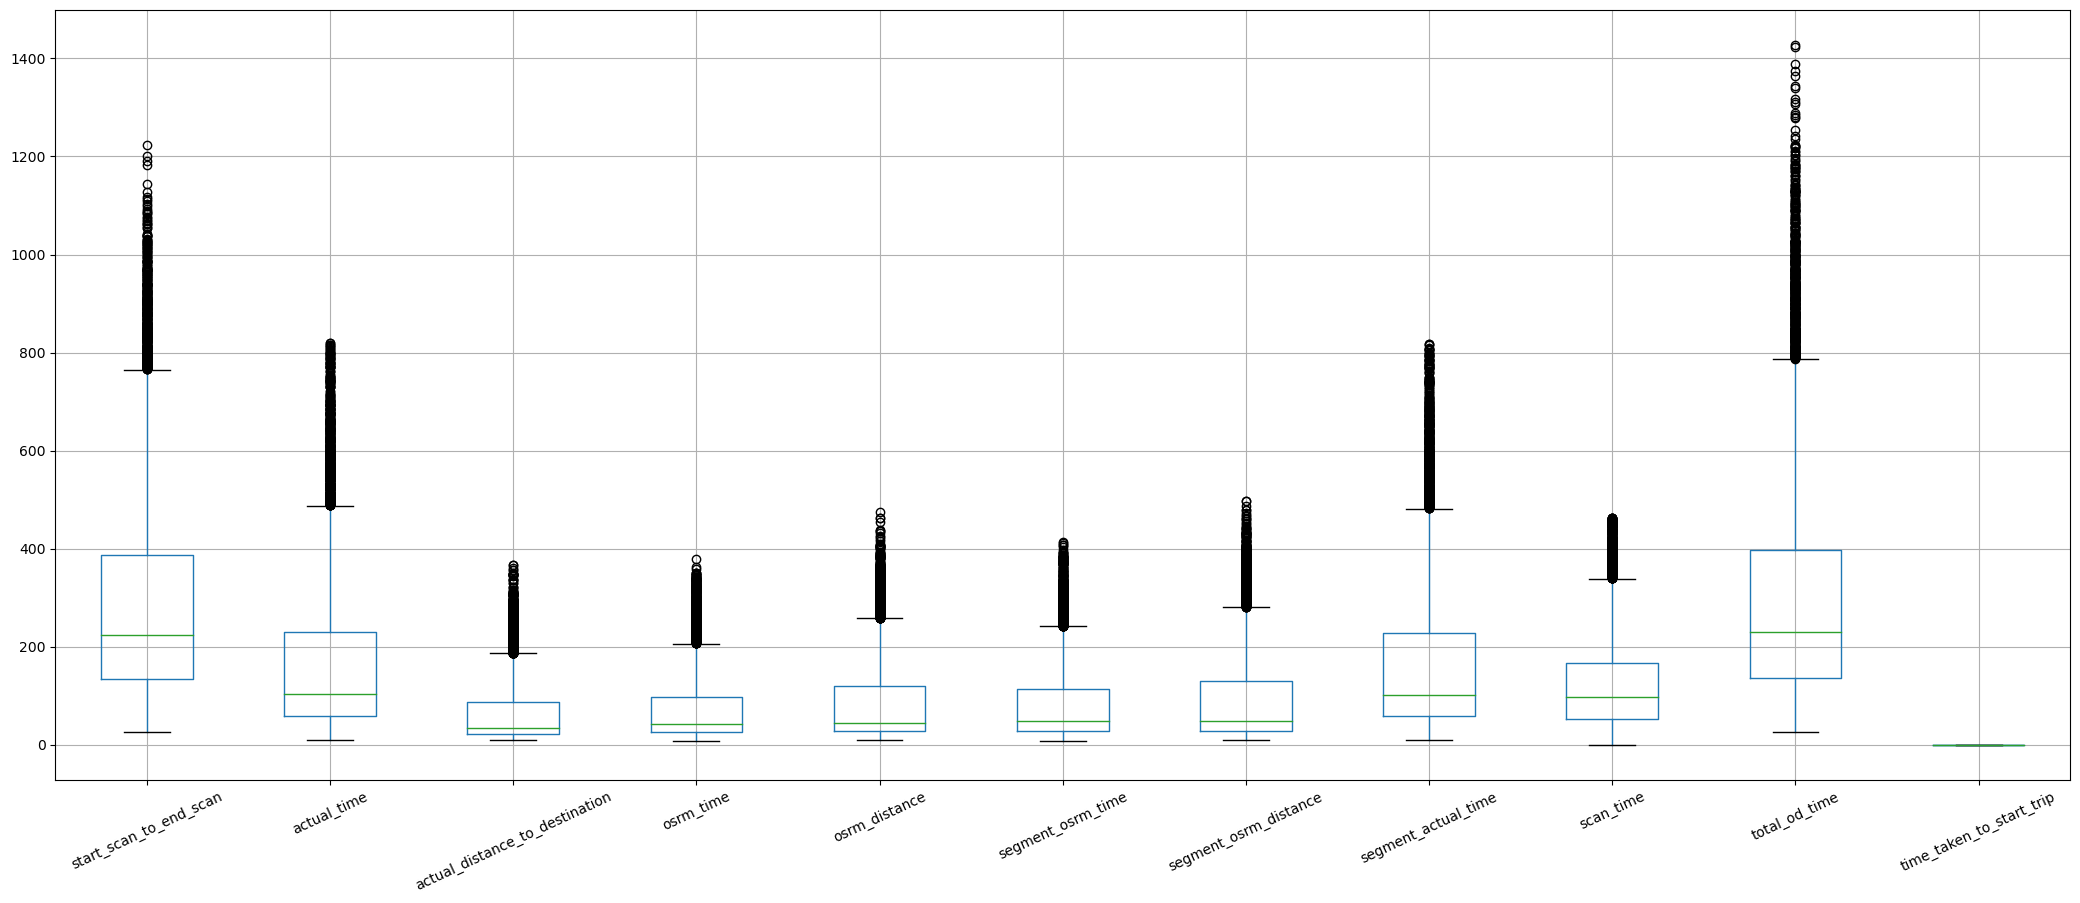

In [77]:
df_trip[num_cols].boxplot(rot=25,figsize=(26,10))

### Handling Categorical Columns - One Hot Encoding

In [78]:
df_trip['route_type'].value_counts()

Carting    7542
FTL        2309
Name: route_type, dtype: int64

In [79]:
df_trip['route_type']=df_trip['route_type'].map({'Carting':0,'FTL':1})

In [80]:
df_trip['route_type'].value_counts()

0    7542
1    2309
Name: route_type, dtype: int64

### Standardization

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_trip[num_cols])

StandardScaler()

In [82]:
df_trip[num_cols]=scaler.transform(df_trip[num_cols])

In [83]:
df_trip[num_cols]

,start_scan_to_end_scan,actual_time,actual_distance_to_destination,osrm_time,osrm_distance,segment_osrm_time,segment_osrm_distance,segment_actual_time,scan_time,total_od_time,time_taken_to_start_trip
1,-0.525177,-0.158367,0.095031,-0.076847,-0.003576,-0.201697,-0.078451,-0.161866,-0.908118,-0.531455,0.0
3,-0.901613,-0.699547,-0.716950,-0.836018,-0.759198,-0.836337,-0.776091,-0.693717,-0.866379,-0.876574,0.0
4,2.001652,1.117271,0.881642,0.625027,0.708736,0.445895,0.600636,1.128846,2.629229,1.756557,0.0
5,-0.482828,-0.686662,-0.609359,-0.721426,-0.662368,-0.745674,-0.687269,-0.687231,0.041436,-0.493109,0.0
6,-0.911024,-0.925038,-0.834007,-0.864665,-0.847677,-0.875192,-0.861333,-0.920727,-0.522036,-0.885096,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14811,-0.958078,-0.834842,-0.708470,-0.821694,-0.749653,-0.836337,-0.769258,-0.836409,-0.772467,-0.927703,0.0
14812,-0.162857,-0.544924,-0.128574,-0.162791,-0.138092,-0.240552,-0.288182,-0.544539,0.521430,0.422949,0.0
14813,-1.089831,-0.944366,-0.741036,-0.878989,-0.800677,-0.901096,-0.817185,-0.940185,-0.887248,-1.047004,0.0
14814,0.608838,0.737157,-0.405133,-0.277383,-0.255641,0.096195,0.146064,0.746172,0.156217,0.495381,0.0


## Insights: 

1. There are 14817 unique trip records
2. Route between Bangalore_Nelmngla_H, Karnataka and Bengaluru_KGAirprt_HB, Karnataka is the most used corridor.
3. Route between Bailhongal_NamoNagr_D, Karnataka and Bailhongal_NamoNagr_D, Karnataka is the least used corridor.
4. Most of the orders are being originated from Maharashtra.
5. Most of the orders are being originated from Gurgaon city.
6. Most of the orders are being delivered to Maharashtra.
7. Most of the orders are being delivered to Bengaluru city.
8. Avg time taken by the busiest corridor is 183.03
9. Avg distance on the busiest corridor is 28.03
10. Data is available for the month of September and October and year 2018.
11. Pappadahandi_Central_DPP_2 (Orissa) is taking the most time to scan while starting the trip.
12. Visakhapatnam_Gajuwaka_IP (Andhra Pradesh) is taking the most time to scan while receiving the products.
13. Carting route type has the routes which are taking longest time to complete the trip
14. Almost 60% of the trips take Carting route type
15. Data has 87% deliveries belonging to September
16. Most of the deliveries happen on 15th and 18th day of the September and 3rd of October month
17. Most of the trips are created on a Wednesday

## Recommendation:

1. For Maharashtra, more no. of resources should be planned as the most no. of deliveries are being handled at this state.
2. Actual time and actual distance are greater than the ones calculated by OSRM which indicates that the trips can be completed within shorter times using the route suggested by OSRM.
3. Centers such as Pappadahandi_Central_DPP_2 (Orissa) & Visakhapatnam_Gajuwaka_IP (Andhra Pradesh) are taking the longest time to scan the products. For these centres, better scanning mechanism can  be implemented or team posted at these centers can also be expanded.
4. Carting route type takes lesser time for deliveries on an average when compared to FTL and hence Carting should be the preferred route type
5. For few states such as Goa, Pondicherry, Bihar & Uttarakhand ,average actual time is very high and difference between average actual time and average osrm time is also high. Therefore, for these states, more factors impacting the routes can be provided as input to OSRM engine for better approximation.
